## Data

The data which are used in this notebook can be downloaded at https://sdrive.cnrs.fr/s/98EFBQ7EjMR57wJ.
In the code below, it is assumed that the data is stored in "testdata" directory.Please specify the path to the data according to your local preferences.

Data contain 2 distinct cases:
- isotropic data, which should be averaged
- anisotropic data, correspondig to mapping of a sample. Detector frames should not be averaged and integrations sectros (horizontal and vertical) should be defined.


## Main functionnalities of swing_tools

Swing_tools library can be decomposed in 4 classes:
- Mask: contain methods to create a maskfile in the suitable edf format, either through the conversion of a foxtrot file, or using an experimental data file
- SwingData: contain methods to perform integration and plots of individual data file
- SwingBatch: contain methods to perform batch analysis of all files contained in a given directory
- TextFileProcessor: contain methods to load data or substract data from others.

### Mask Class

The Mask class can be used to generate mask files in a format compatible with the library. It can handle 2 type of files:
- *.txt files, corresponding to maks files generated by foxtrot. The method convertfoxtrotmask() can be used to convert the mask in the suitable 'edf' format
- *.h5 files corresponding to data file from Swing. The method drawmask() uses the scattering data as input of pyFAI-drawmask so that the user can generate its own mask. This function can be useful when using data reconstruction with caving algorithms, in which case a specific mask file should be specified

#### Example of mask creation using h5 data file

Execution of the code below will open pyFAI-drawmask interface. Don't forget to save the mask on your drive before quit.

In [ ]:
from swing_tools import Mask
# On SWING, you will probably get from beamline scientist a mask file in foxtrot format. 
# The following code can handle this situation:
path='./testdata/anisotropic/'
# foxtrot mask file
file=path+'mask_lacroix_jul24.txt'
# create mask using a h5 file
test=Mask(file)
test.convertfoxtrotmask()


In [4]:
# In the 'isotropic' example, no mask file is provided. The mask has to be created by the user using a datafile.
from swing_tools import Mask
path='./testdata/isotropic/'
datafile=path+'rodriguez_05565_2024-10-12_15-45-32.h5'
mask=Mask(datafile)
mask.draw_mask() # don't forget to save mask, e.g. in ./testdata/isotropic/mask.edf

Your mask-file will be saved into /home-local/ratel-ra/Documents/SAXS_data/SAXS_SWING/SwingTools-main/temp-mask.edf
Mask-file saved into /home-local/ratel-ra/Documents/SAXS_data/SAXS_SWING/SwingTools-main/temp-mask.edf
Selected 93347 datapoints on file /home-local/ratel-ra/Documents/SAXS_data/SAXS_SWING/SwingTools-main/temp.edf
On File: /home-local/ratel-ra/Documents/SAXS_data/SAXS_SWING/SwingTools-main/temp.edf,	 mean= 2955179701.2142415 	 std= 1989802275.1965868



### SwingData class

This class was designed to handle individual h5 files. A SwingData instance can be initialized with the following parameters:
- filename: str : path to data faile (*.h5 or *.nxs)
- maskfile: str : path to mask file (*.edf format)
- basler_coords: tuple:  pixel coordinates of X-ray beam on basler image, provided by the beamline scientist on request (don't forget to ask!)
- basler_calibration: tuple calibration of basler image (in µm/pixels), along X and along Z
- anisotropic_data: bool Set True top optimize integration of anisotropic data (slow down computation), (default= False)
- sectors: List(tuple) List of angular sectors to perform azimuthal integration [(angle, delta)] (default=None, corresponds to isotropic averaging)
- average_frames: bool Tag to perform averaging of scattering frames contained in h5 file (default = True)
- transmission_correction: bool Tag to perform transmission corrections (default=True)

#### List of methods available in SwingData

- save_integration(): This method will save integration results as txt files in a subdirectory called integration. In the case of anisotropic data, an additional directory is created, which contains 2D maps data, allowing to perform additional analysis of azimuthal profiles for instance (not implemented in the library). For each frame, these 2D maps can be recomputed by using 3 files (each of them contains q, or chi or I data, single column files). Note that eiger frames will be reconstructed by inversion symmetry (caving). This algorithm can partially remove the detector dead zones, if the scattering is centered on the detector (it's not usually the case, think about it while preparing your experiment!)

- plot_data(): This method will generate plots of data, stored in a subdirectory called plot. In the case of anisotropic data, 2D maps data (q,chi,I) are also visualized. 

- plot_and_save(): This methods combines the two above mentionned methods in a single command

### Isotropic example

In [5]:
from swing_tools import SwingData
path='./testdata/isotropic/'
file=path+'rodriguez_05565_2024-10-12_15-45-32.h5'
mask='./testdata/isotropic/mask.edf'
data=SwingData(file,
               mask,
               average_frames=True,
               basler_coords = [508, 534])
data.plot_and_save()

### Anisotropic example

The coordinates of the X-ray beam on the basler image are (186,309).
Calibration of basler image is around 3.7µm/pixel

In [1]:
from swing_tools import SwingData
path='./testdata/anisotropic/'
file=path+'lacroix_04287_2024-07-22_01-31-41.h5'
mask='./testdata/anisotropic/mask_lacroix_jul24.edf'

# For this data, we have several frames in a single h5file, corresponding to a linescan.
# We therefore won't average the frames contained in a single h5
# We also expect anisotropic behaviour and will integrate horizontally (to the left) and vertically (up)
# we will use data caving to complete detector gpas, remove beamstop,...


# Create class instance
data=SwingData(file,
               mask,
               sectors=[(-90,30),(-180,30)],
               basler_coords=[186,309],
               basler_calibration=[3.7,3.7],
               anisotropic_data=True,
               average_frames=False)
data.plot_and_save()



### Class SwingBatch

### Isotropic example

In [6]:
from swing_tools import SwingBatch
path='./testdata/isotropic'
mask=path+'/mask.edf'
batch=SwingBatch(path,
                 mask,
                 basler_coords=[508,534])
batch.process()


'Processing... 2/2 files (100%)'

Log file created: ./testdata/isotropic/processing_log.txt


#### Anisotropic example

In [ ]:
from swing_tools import SwingBatch
path='./testdata/anisotropic'
mask=path+'/mask.edf'
batch=SwingBatch(path,
                 mask,
                 basler_coords=[186,309],
                 basler_calibration=[3.73,3.67],
                 anisotropic_data=True,
                 average_frames=False,
                 transmission_correction=True)
batch.process()

In [ ]:
batch.create_video_from_images()

### Manipulate Txt files

text files created by integration can be easily handled with numpy.loadtxt(). Here is a short example.

#### Isotropic data

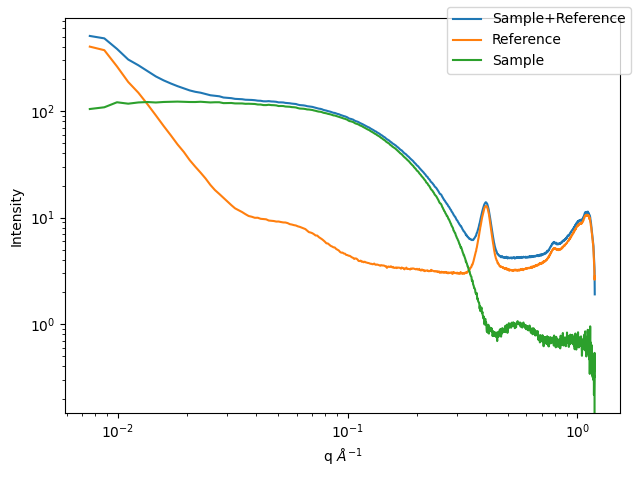

In [8]:
import numpy as np
from matplotlib import pyplot as plt
path='./testdata/isotropic/integration/'
sample_file=path+'05732_integ_norm_frame001_sector_0_180.txt'
ref_file=path+'05565_integ_norm_frame001_sector_0_180.txt'

q_sample,i_sample=np.loadtxt(sample_file,skiprows=1,unpack=True)
q_ref,i_ref=np.loadtxt(ref_file,skiprows=1,unpack=True)


# Make plot
fig,ax=plt.subplots()
ax.loglog(q_sample,i_sample,label='Sample+Reference')
ax.loglog(q_ref,i_ref,label='Reference')
ax.loglog(q_sample,i_sample-i_ref,label='Sample')
ax.set_xlabel('q $\\AA^{-1}$')
ax.set_ylabel('Intensity')
fig.legend()
fig.tight_layout()

# save substracted data
filename=path+'05732_substracted.txt'
np.savextxt(filename,np.column_stack([q_sample,i_sample-i_ref]))